# **1. Load Dataset**

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [1]:
# Memuat dataset dengan as_frame=True agar langsung menjadi DataFrame
data = datasets.load_breast_cancer(as_frame=True)

# Mengambil hanya fitur dalam bentuk DataFrame
df = data.frame

# Menampilkan 5 baris pertama
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# 2. EDA

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


<ipython-input-10-a0f4bda2957a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['target'], palette="coolwarm")


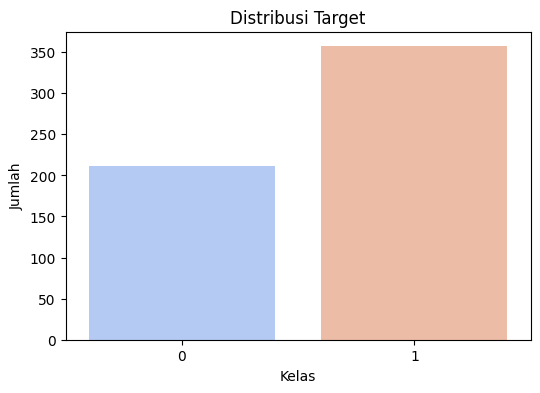

In [10]:
# Visualisasi Distribusi Data
plt.figure(figsize=(6, 4))
sns.countplot(x=df['target'], palette="coolwarm")
plt.title("Distribusi Target")
plt.xlabel("Kelas")
plt.ylabel("Jumlah")
plt.show()

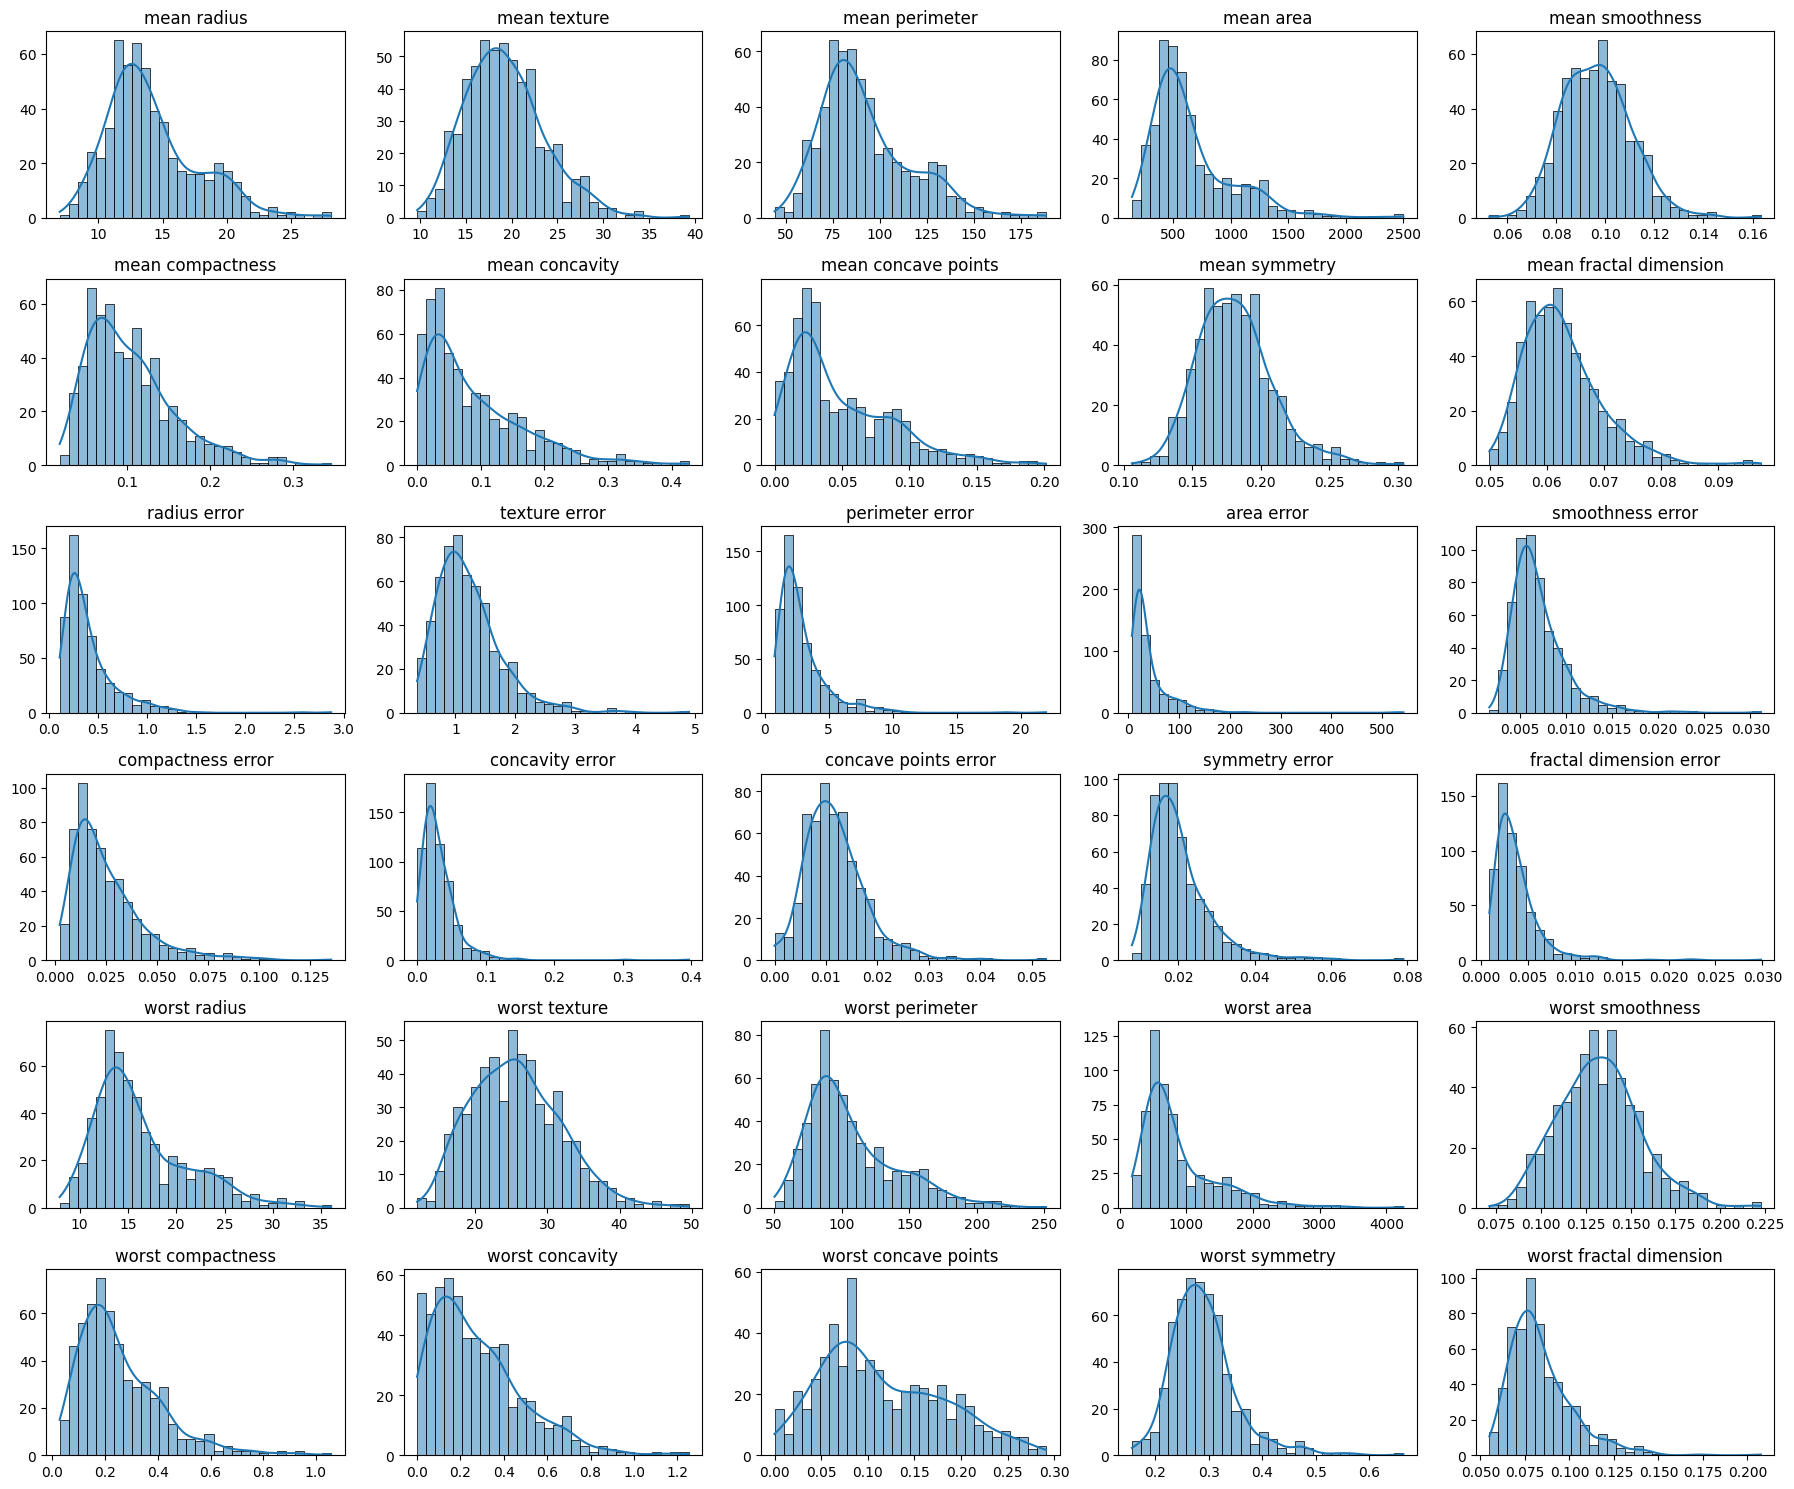

In [18]:
# Visualisasi Distribusi Fitur
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(df.columns[:-1]):  # Menghindari kolom target
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

plt.tight_layout()
plt.show()

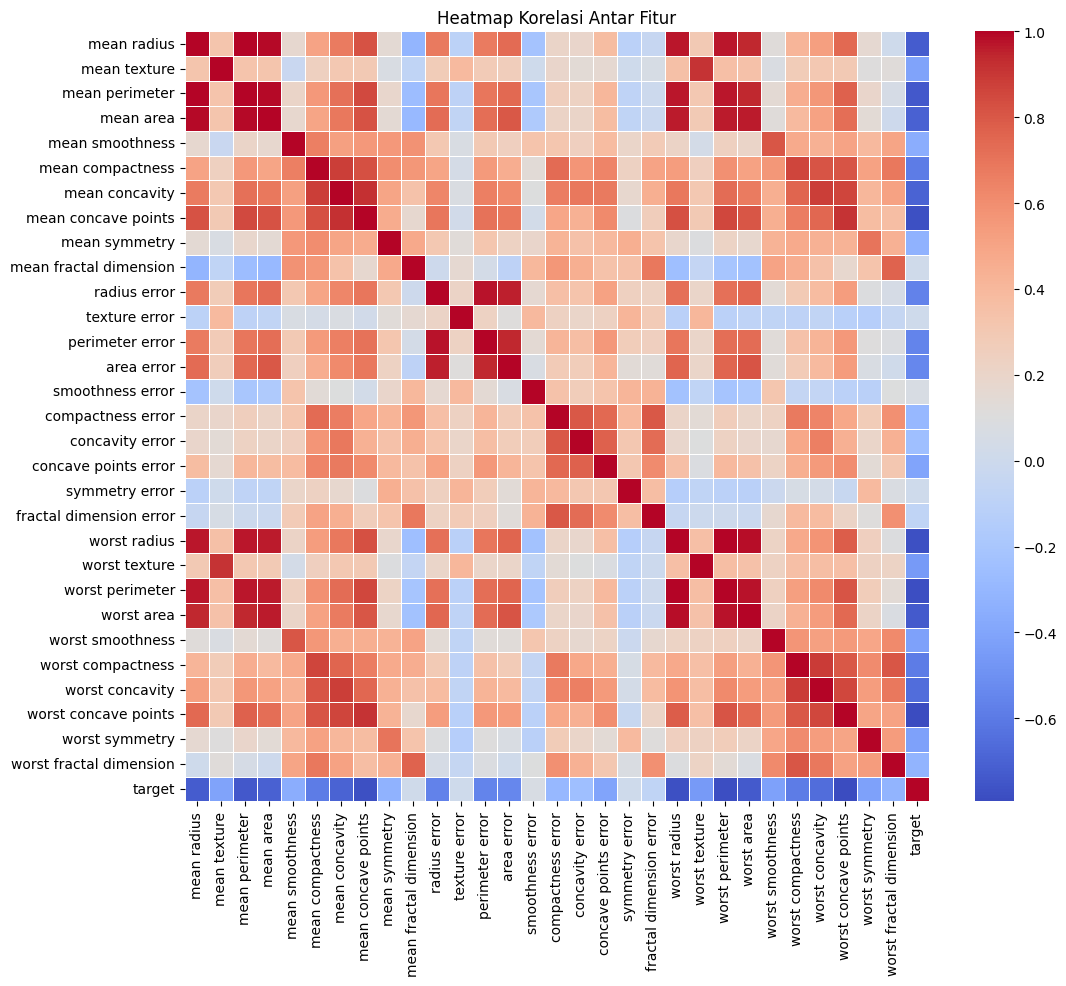

In [17]:
# Visualisasi Korelasi Antar Fitur
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

<ipython-input-22-1f5521b665c5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["target"], y=df[col], palette="coolwarm")
<ipython-input-22-1f5521b665c5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["target"], y=df[col], palette="coolwarm")
<ipython-input-22-1f5521b665c5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["target"], y=df[col], palette="coolwarm")
<ipython-input-22-1f5521b665c5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable

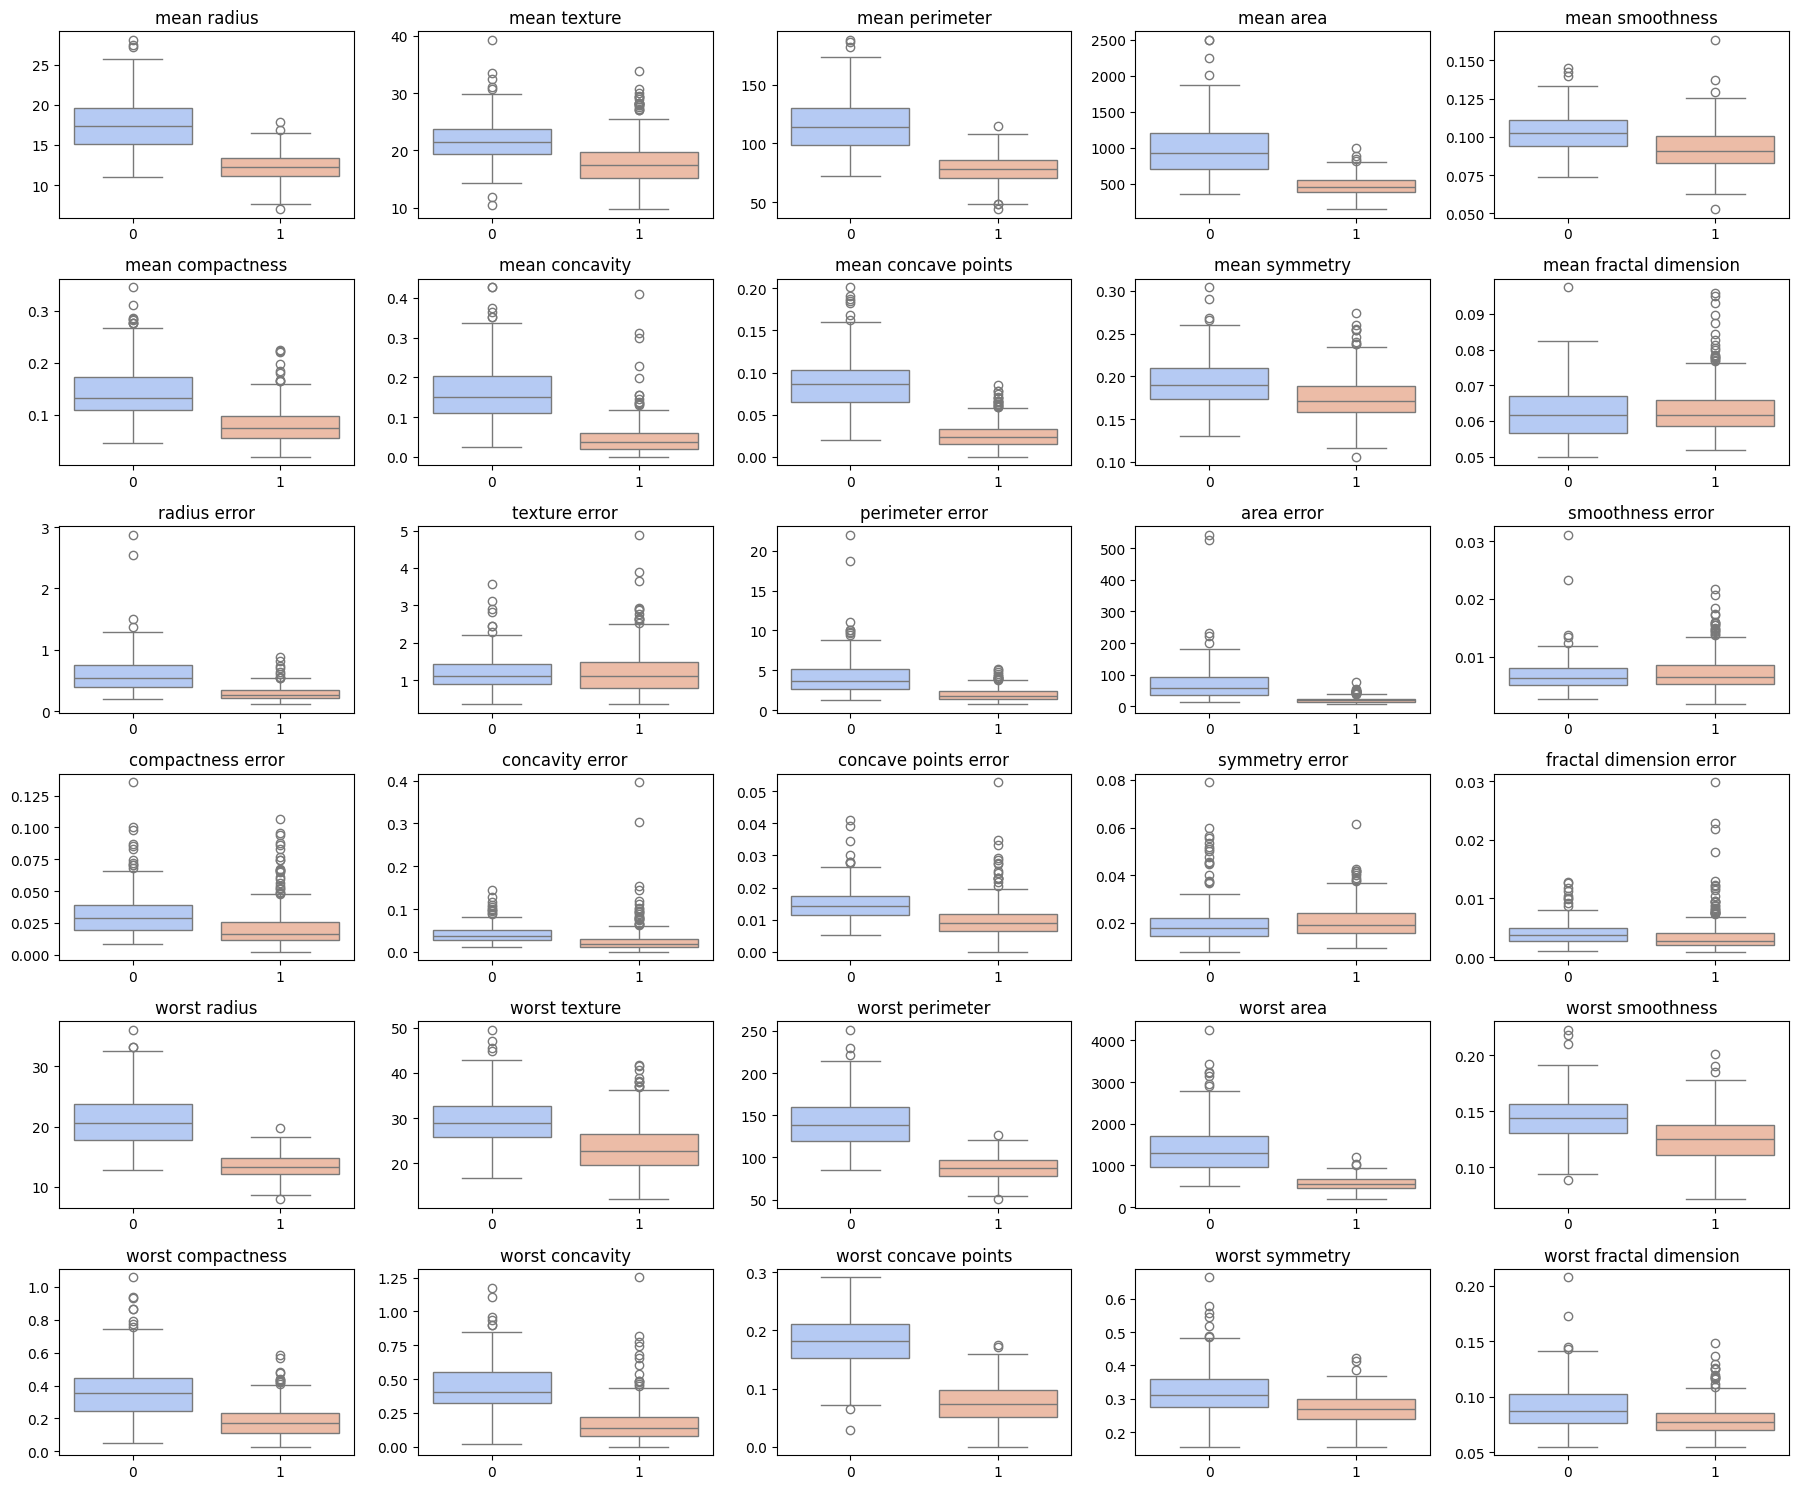

In [22]:
# Visualisasi beberapa fitur
plt.figure(figsize=(18, 15))

# Plot semua fitur dalam satu gambar
for i, col in enumerate(df.columns[:-1]):  # Hindari kolom target
    plt.subplot(6, 5, i+1)  # Buat grid 6x5
    sns.boxplot(x=df["target"], y=df[col], palette="coolwarm")
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()


# **3. Split Data**

In [24]:
# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['target'])
y = df['target']

# Split data menjadi train (80%) dan test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standarisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **4. Train the Model**

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi model
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Train dan evaluasi setiap model
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Train model
    y_pred = model.predict(X_test_scaled)  # Prediksi
    acc = accuracy_score(y_test, y_pred)  # Evaluasi akurasi
    results[name] = acc

# **5. Predict & Evaluate**

In [49]:
from sklearn.metrics import accuracy_score

# Tampilkan hasil
print("Akurasi Tiap Model")
for model, acc in results.items():
    print(f"{model}:  {acc:.4f}")

Akurasi Tiap Model
Random Forest:  0.9561
SVM:  0.9825
KNN:  0.9561
Naive Bayes:  0.9298
Decision Tree:  0.9123


<ipython-input-50-4f7215fb085c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results_df, palette="viridis")


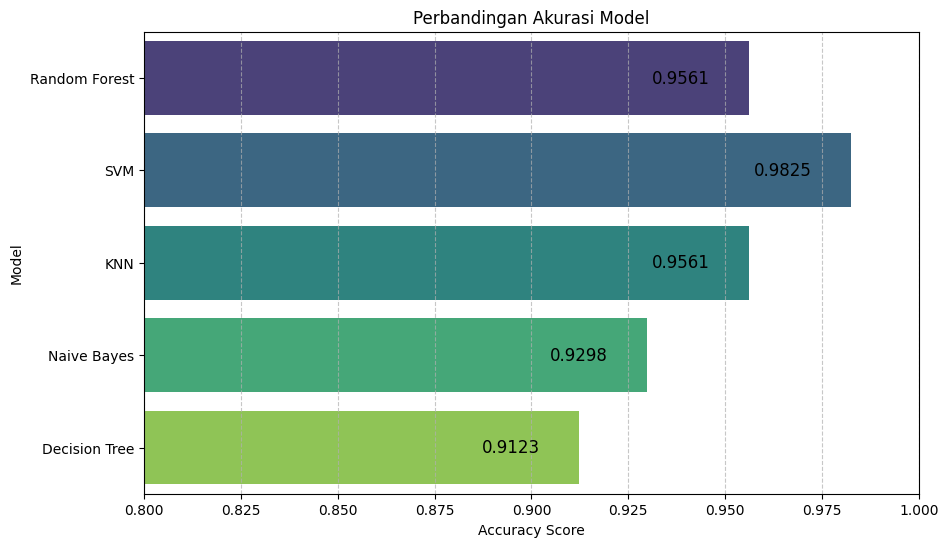

In [50]:
# Konversi hasil ke DataFrame untuk visualisasi
import pandas as pd
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette="viridis")
plt.xlabel("Accuracy Score")
plt.ylabel("Model")
plt.title("Perbandingan Akurasi Model")
plt.xlim(0.8, 1)  # Sesuaikan batas jika perlu
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Tampilkan nilai akurasi di setiap bar
for index, value in enumerate(results_df['Accuracy']):
    plt.text(value - 0.01, index, f"{value:.4f}", va='center', ha='right', color='black', fontsize=12)

plt.show()

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

# Memilih model dengan akurasi terbaik
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

# Melakukan prediksi dengan model terbaik
y_pred_best = best_model.predict(X_test_scaled)

# Menampilkan classification report dan confusion matrix
print(f"Best Model: {best_model_name}")
print("Classification Report:\n", classification_report(y_test, y_pred_best))

Best Model: SVM
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



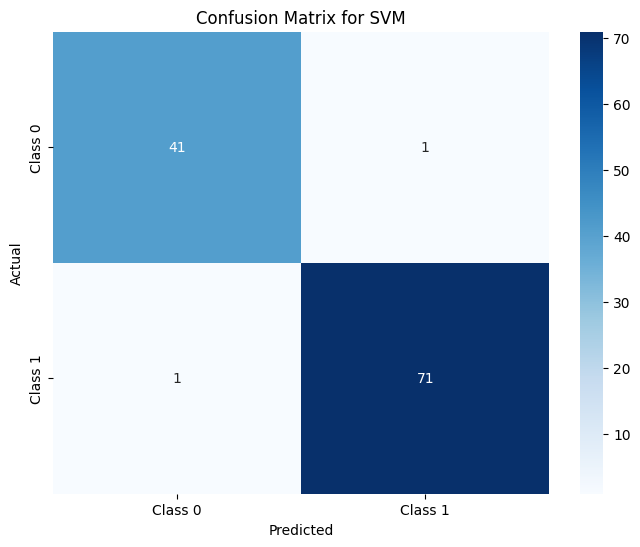

In [54]:
# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Membuat plot confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()